In [13]:
import rioxarray
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Polygon
# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

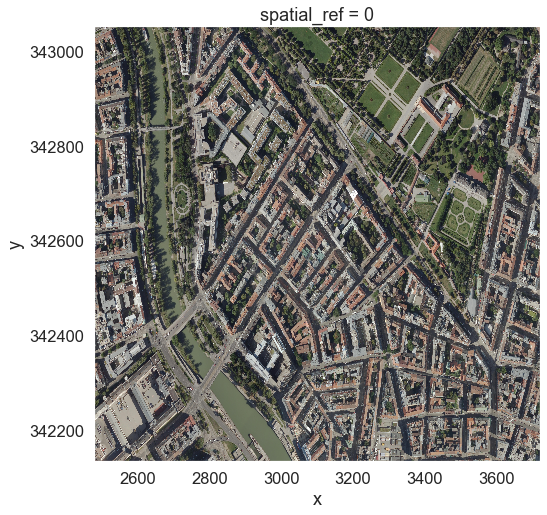

In [14]:
# Load image and visualize
austria_tile = rioxarray.open_rasterio('data/testCropped.tif')
austria_tile.plot.imshow(figsize=(8,8))

<AxesSubplot:>

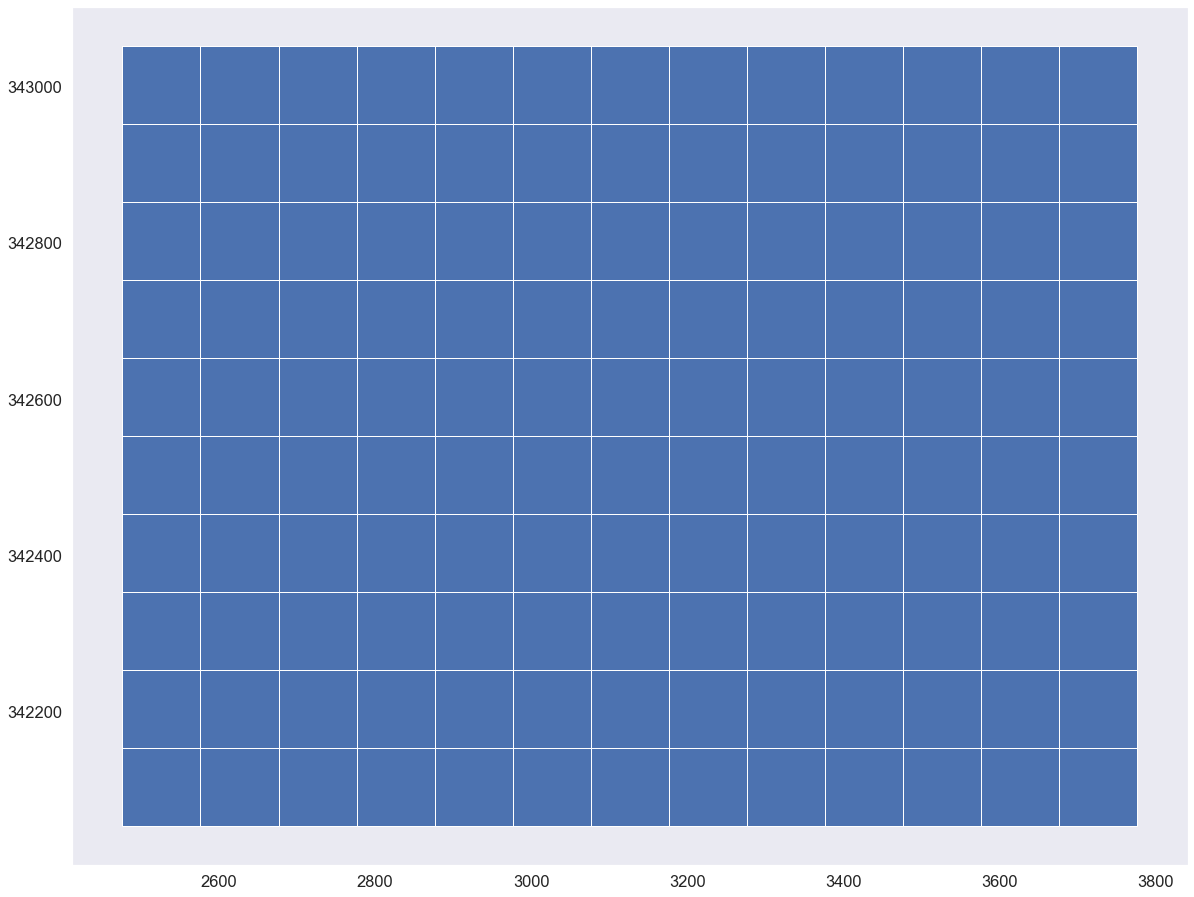

In [16]:
xmin,ymin,xmax,ymax =  [np.double(min(austria_tile["x"])),min(np.double(austria_tile["y"])),max(np.double(austria_tile["x"])),max(np.double(austria_tile["y"]))]
width = 100
height = 100
rows = int(np.ceil((ymax-ymin) /  height))
cols = int(np.ceil((xmax-xmin) / width))
XleftOrigin = xmin
XrightOrigin = xmin + width
YtopOrigin = ymax
YbottomOrigin = ymax- height
polygons = []
for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        Ytop = Ybottom
        Ybottom = Ybottom - height
    XleftOrigin = XrightOrigin
    XrightOrigin = XrightOrigin + width
grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid.shp")
grid.plot(figsize=(20,20))

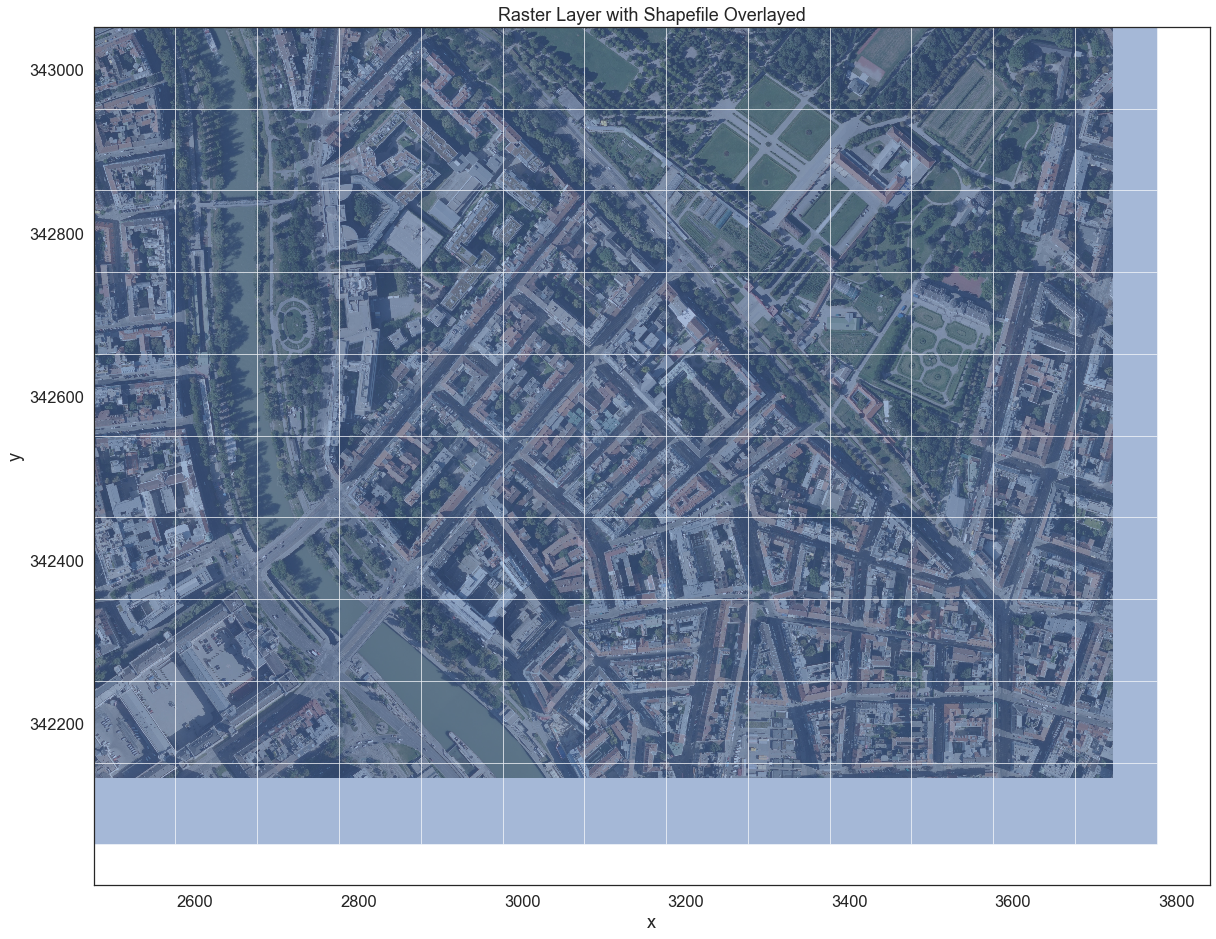

In [11]:
test_cell = gpd.GeoDataFrame({'geometry':[grid.loc[0, ('geometry')]]})
f, ax = plt.subplots(figsize=(20, 20))
austria_tile.plot.imshow(ax=ax)
grid .plot(ax=ax, alpha=0.5)
ax.set(title="Raster Layer with Shapefile Overlayed")
#ax.set_axis_off()
plt.show()

c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\windows.py:310: RasterioDeprecationWarning: The height, width, and precision parameters are unused, deprecated, and will be removed in 2.0.0.
  warnings.warn(
c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\windows.py:310: RasterioDeprecationWarning: The height, width, and precision parameters are unused, deprecated, and will be removed in 2.0.0.
  warnings.warn(
c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\windows.py:310: RasterioDeprecationWarning: The height, width, and precision parameters are unused, deprecated, and will be removed in 2.0.0.
  warnings.warn(
c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\windows.py:310: RasterioDeprecationWarning: The height, width, and precision parameters are unused, deprecated, and will be removed in 2.0.0.
  warnings.warn(
c:\Users\jcarvajal\A

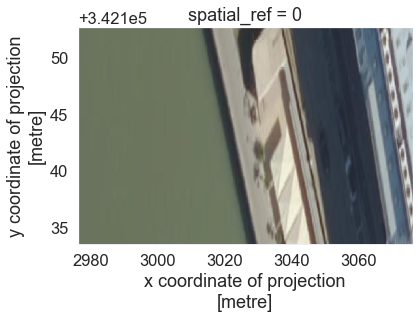

In [17]:
for x in range(0,60):
  test_cell = gpd.GeoDataFrame({'geometry':[grid.loc[x, ('geometry')]]})
  test_cell = test_cell.set_crs(austria_tile.rio.crs) # convert to the same CRS
  austria_clip = austria_tile.rio.clip_box(*test_cell.total_bounds)
  austria_clip.plot.imshow()
  austria_clip.rio.to_raster("data/tifclip%s.tif"%x)

In [10]:
austria_clip.rio.crs

CRS.from_epsg(31256)